<a href="https://colab.research.google.com/github/Paradorn657/recurrent_nearal/blob/master/naive_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("series")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi),1 / np.exp(3 * season_time))
      
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def white_noise(time, noise_level=1, seed=None):
  #seed เป็น ค่า Probability ในการสุ่มตัวเลข
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level 

In [0]:
time = np.arange(4*365+1)
slope = 0.05
amplitude = 40
series = 10 + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude) 
# series -> ลำดับเหตุการณ์
# amplitude -> ความสูงของกราฟ



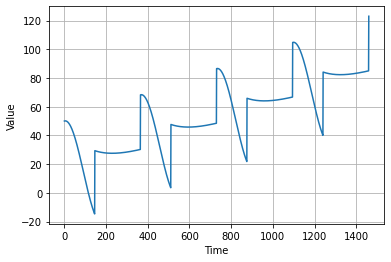

In [9]:
plot_series(time,series)

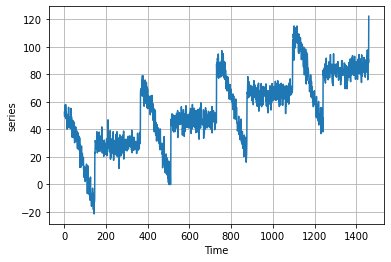

In [12]:
series = 10 + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude) + white_noise(time,5,42)
plot_series(time,series)

In [28]:
series # มี 1461 ตัวเพราะมี 0 ด้วย 0->1460 4 ปี

array([ 52.48357077,  49.35275206,  53.31473872, ...,  91.37325376,
        88.32382529, 122.30772008])

In [0]:
train_series = series[:1000]
train_time = time[:1000]
valid_series = series[1000:]

valid_time = time[1000:]
# เอาตัว 1000 ถึงตัวสุดท้าย

In [0]:
naive_forecast = series[999:-1]
# เอาตัว 999 ถึงตัวก่อนสุดท้าย [include,exclude] 
# ทำแบบนี้เพื่อให้ size เท่ากัน และให้เห็นเส้นน้ำเงินเส้นสุดท้าย

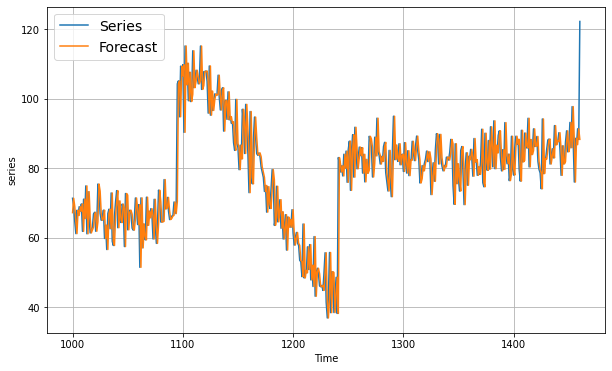

In [39]:
plt.figure(figsize=(10, 6))
plot_series(valid_time, valid_series, label="Series")
plot_series(valid_time, naive_forecast, label="Forecast")

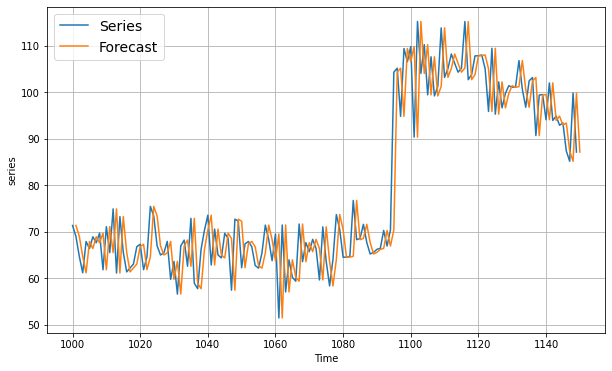

In [44]:
plt.figure(figsize=(10, 6))
plot_series(valid_time, valid_series, start=0, end=150, label="Series")
plot_series(valid_time, naive_forecast, start=1, end=151, label="Forecast")

**มันก็คือข้อมูลเดียวแค่ เส้นส้ม ถูกเลื่อนมาหนึ่งวัน**
เส้นสีน้ำเงิน คือ เส้นที่แท้จริงและเส้นสีส้มคือเส้นที่ naive forecast


# **การทำ naive ข้างต้นเพื่อเป็นพื้นฐานให้เห็นภาพ แต่เส้นส้มเราต้อง **predictทำนายอนาคตไม่ใช่** ตัดจาก valid series **

ข้างล่างนี้คือการวัดค่า loss

In [0]:
import tensorflow as tf

In [53]:
tf.keras.losses.mean_absolute_error(valid_series,naive_forecast).numpy()

5.9379085153216735

loss ค่านี้ คือ ค่าที่เราเอา naive_forecast ตัวที่ 999 เป็นตัวแรก และ ไม่เอาตัวสุดท้าย